### Análisis de componentes
### Introducción a Python
### GitHub repository: https://github.com/jorgemauricio/analisis_componentes
### Instructor: Jorge Mauricio

In [1]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

%matplotlib inline

In [2]:
# leer csv
df = pd.read_csv("data/PAPAYA_ANTIOXIDANTES.csv")

In [3]:
# estructura del csv
df.head()

,MUESTRA,ABTS,DPPH,POLIENOLES
0,PaSAC50,4.491776,68.978450,2.914054
1,PaSAC50,4.556754,68.892229,1.966109
2,PaSAC50,4.509518,68.867843,2.737142
3,PaSAC50,4.759186,68.979699,1.199075
4,PaSAC50,4.509271,68.899726,1.489760


In [4]:
df.MUESTRA.unique()

array(['PaSAC50', 'PaSAC80', 'PaLIO50', 'PaLIO80'], dtype=object)

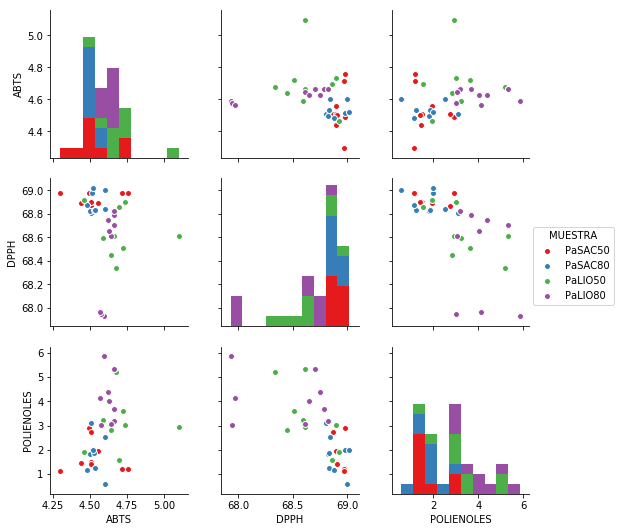

In [5]:
# EDA (Exploratory Data Analysis) correlación entre variables
sns.pairplot(df,hue='MUESTRA',palette='Set1')

In [6]:
# dividir los datos en entrenamiento y prueba para evitar que el modelo se sobrealimente
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('MUESTRA',axis=1)
y = df['MUESTRA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
# UTILIZAMOS UN ARBOL DE DECISIONES PARA DETERMINAR COMO ES QUE SE CLASIFICAN LOS COMPUESTOS DE ACUERDO
# A SUS CUALIDADES
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
# prediction and evaluation
predictions = dtree.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    PaLIO50       1.00      0.25      0.40         4
    PaLIO80       0.50      1.00      0.67         1
    PaSAC50       0.75      1.00      0.86         3
    PaSAC80       0.50      0.67      0.57         3

avg / total       0.75      0.64      0.60        11



In [10]:
print(confusion_matrix(y_test,predictions))

[[1 0 1 2]
 [0 1 0 0]
 [0 0 3 0]
 [0 1 0 2]]


In [11]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['ABTS', 'DPPH', 'POLIENOLES']

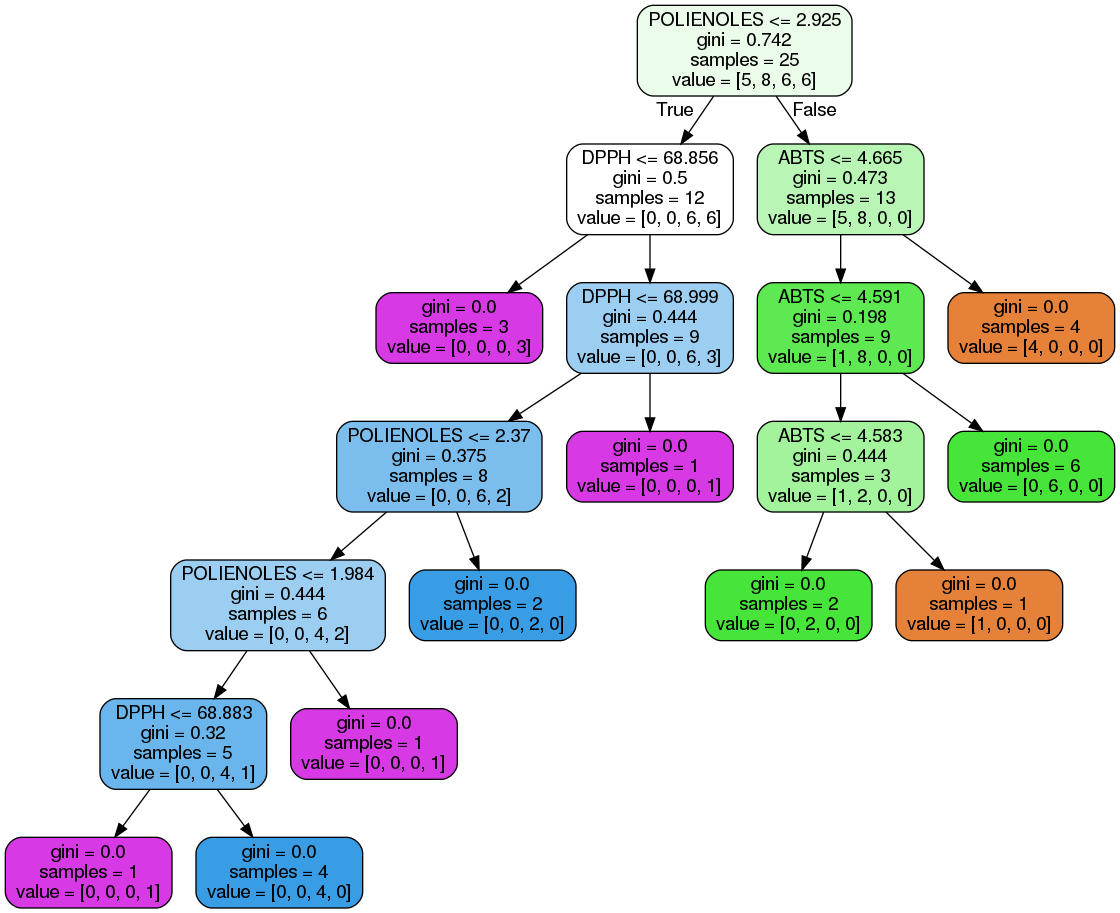

In [12]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [13]:
# random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[2 0 2 0]
 [0 1 0 0]
 [0 0 3 0]
 [0 1 1 1]]


In [15]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    PaLIO50       1.00      0.50      0.67         4
    PaLIO80       0.50      1.00      0.67         1
    PaSAC50       0.50      1.00      0.67         3
    PaSAC80       1.00      0.33      0.50         3

avg / total       0.82      0.64      0.62        11



In [16]:
# PCA
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.drop("MUESTRA", axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled_data = scaler.transform(X)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
x_pca = pca.transform(scaled_data)

In [23]:
scaled_data.shape

(36, 3)

In [24]:
x_pca.shape

(36, 2)

In [25]:
X.head()

,ABTS,DPPH,POLIENOLES
0,4.491776,68.978450,2.914054
1,4.556754,68.892229,1.966109
2,4.509518,68.867843,2.737142
3,4.759186,68.979699,1.199075
4,4.509271,68.899726,1.489760


In [26]:
def generar_indice(elemento):
    if elemento == "PaSAC50":
        return 1
    if elemento == "PaSAC80":
        return 2
    if elemento == "PaLIO50":
        return 3
    if elemento == "PaLIO80":
        return 4

In [27]:
y_dummies = list(map(generar_indice,y))

Text(0,0.5,'Second Principal Component')

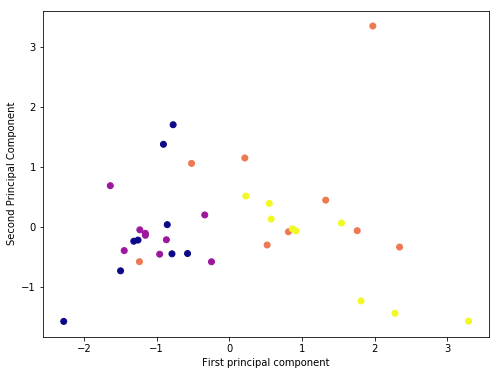

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_dummies,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [29]:
# interpreting the components
pca.components_

array([[ 0.40925724, -0.63108001,  0.65897384],
       [ 0.90378079,  0.3795311 , -0.19782932]])

In [30]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

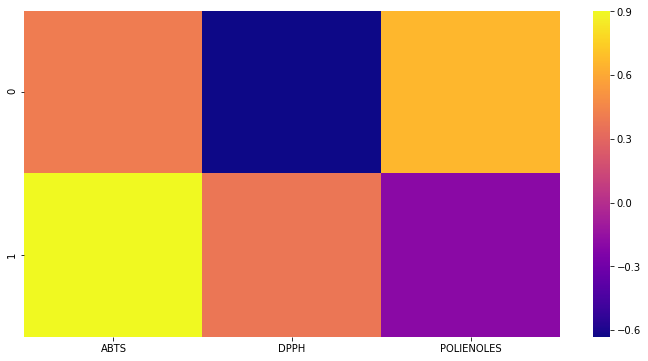

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [32]:
# K Nearest Neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y_dummies,
                                                    test_size=0.30)

In [33]:
# using KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [35]:
pred = knn.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,pred))

[[2 1 0 0]
 [1 1 0 0]
 [0 0 0 2]
 [0 0 1 3]]


In [38]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.67      0.67      0.67         3
          2       0.50      0.50      0.50         2
          3       0.00      0.00      0.00         2
          4       0.60      0.75      0.67         4

avg / total       0.49      0.55      0.52        11



In [39]:
# choosing a K Value
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

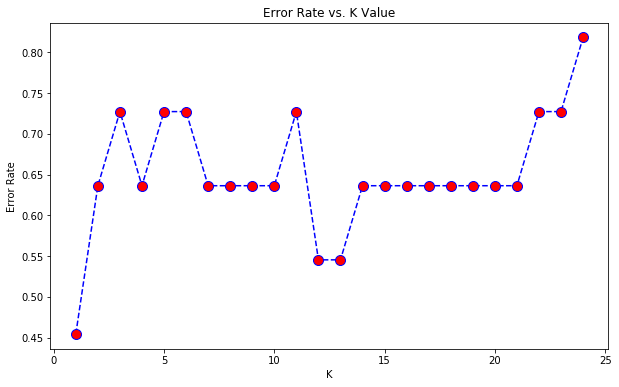

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[2 1 0 0]
 [1 1 0 0]
 [0 0 0 2]
 [0 0 1 3]]


             precision    recall  f1-score   support

          1       0.67      0.67      0.67         3
          2       0.50      0.50      0.50         2
          3       0.00      0.00      0.00         2
          4       0.60      0.75      0.67         4

avg / total       0.49      0.55      0.52        11



In [42]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[0 3 0 0]
 [0 2 0 0]
 [0 1 1 0]
 [0 4 0 0]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00         3
          2       0.20      1.00      0.33         2
          3       1.00      0.50      0.67         2
          4       0.00      0.00      0.00         4

avg / total       0.22      0.27      0.18        11



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# EDA

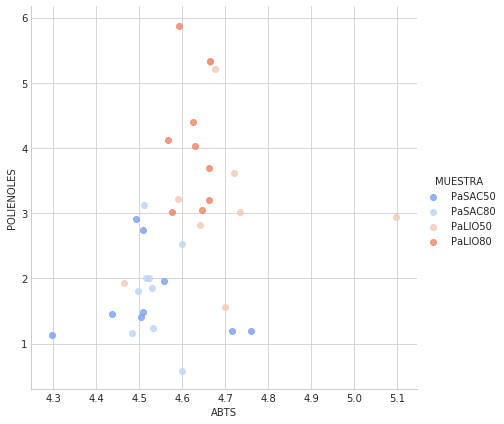

In [43]:
sns.set_style('whitegrid')
sns.lmplot('ABTS','POLIENOLES',data=df, hue='MUESTRA',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=6)

In [46]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
kmeans.cluster_centers_

array([[ 4.6492491 , 68.39541156,  5.43145493],
       [ 4.58444861, 68.8705852 ,  2.91951435],
       [ 4.55341554, 68.91903117,  1.24237752],
       [ 4.64053112, 68.53328846,  3.97255621],
       [ 4.51434029, 68.91060948,  1.92666007],
       [ 4.7097868 , 68.44267109,  3.00966716]])

In [48]:
kmeans.labels_

array([1, 4, 1, 2, 2, 2, 2, 2, 2, 1, 1, 4, 4, 4, 2, 2, 2, 4, 1, 0, 0, 2,
       3, 5, 4, 5, 5, 3, 0, 0, 1, 5, 5, 3, 3, 3], dtype=int32)

In [49]:
df.head()

,MUESTRA,ABTS,DPPH,POLIENOLES
0,PaSAC50,4.491776,68.978450,2.914054
1,PaSAC50,4.556754,68.892229,1.966109
2,PaSAC50,4.509518,68.867843,2.737142
3,PaSAC50,4.759186,68.979699,1.199075
4,PaSAC50,4.509271,68.899726,1.489760


In [53]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [50]:
df['Cluster'] = df['MUESTRA'].apply(generar_indice)
df.head(10)

,MUESTRA,ABTS,DPPH,POLIENOLES,Cluster
0,PaSAC50,4.491776,68.978450,2.914054,1
1,PaSAC50,4.556754,68.892229,1.966109,1
2,PaSAC50,4.509518,68.867843,2.737142,1
3,PaSAC50,4.759186,68.979699,1.199075,1
4,PaSAC50,4.509271,68.899726,1.489760,1
5,PaSAC50,4.437079,68.895320,1.452699,1
6,PaSAC50,4.714201,68.974701,1.199075,1
7,PaSAC50,4.296843,68.973451,1.126404,1
8,PaSAC50,4.504522,68.902814,1.416381,1
9,PaSAC80,4.600050,68.844715,2.522816,2


In [56]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[0 0 0 0 0 0]
 [9 0 0 0 0 0]
 [0 0 6 0 0 3]
 [0 0 0 8 1 0]
 [0 9 0 0 0 0]
 [0 0 0 0 0 0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         9
          2       1.00      0.67      0.80         9
          3       1.00      0.89      0.94         9
          4       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         0

avg / total       0.50      0.39      0.44        36



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


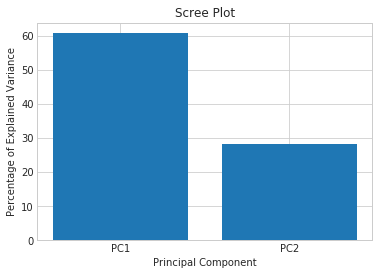

In [52]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [64]:
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(X, index=X.columns, columns=labels)
 


In [54]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

Index(['ABTS', 'DPPH', 'POLIENOLES'], dtype='object')

In [65]:
pca_df

,PC1,PC2
ABTS,NaN,NaN
DPPH,NaN,NaN
POLIENOLES,NaN,NaN


In [67]:
per_var

array([60.7, 28.1])